In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
depths = [1, 2, 3]
print("Decision Tree Results (max_depth, train_acc, test_acc):")
for d in depths:
    clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Depth={d}: Train Accuracy={train_acc:.3f}, Test Accuracy={test_acc:.3f}")




Decision Tree Results (max_depth, train_acc, test_acc):
Depth=1: Train Accuracy=0.667, Test Accuracy=0.667
Depth=2: Train Accuracy=0.971, Test Accuracy=0.889
Depth=3: Train Accuracy=0.981, Test Accuracy=0.978


k = 1 -> Train Accuracy = 0.943, Test Accuracy = 0.778


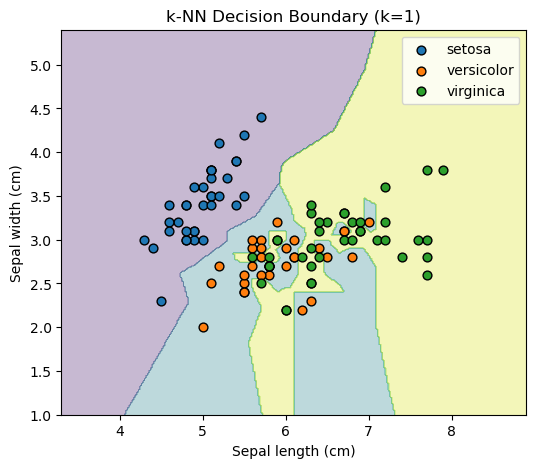

k = 3 -> Train Accuracy = 0.867, Test Accuracy = 0.733


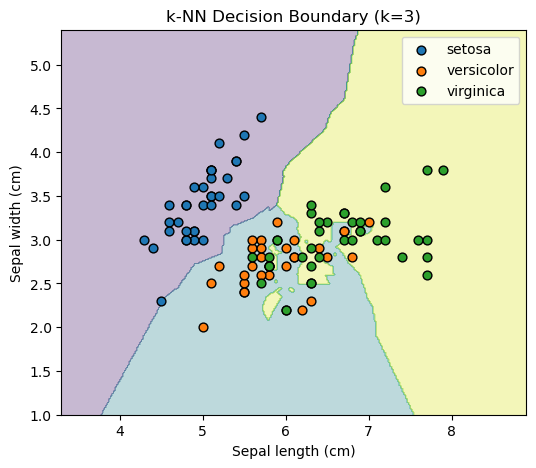

k = 5 -> Train Accuracy = 0.857, Test Accuracy = 0.800


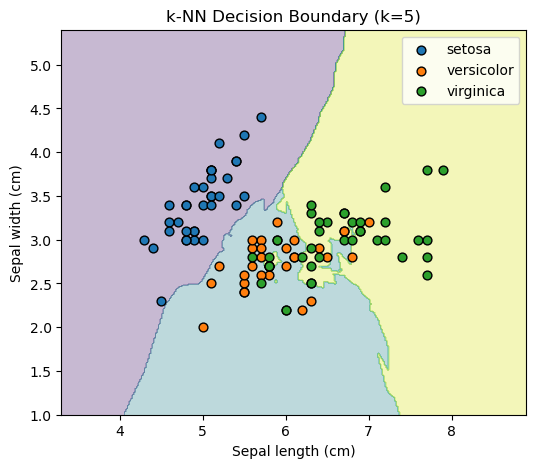

k = 10 -> Train Accuracy = 0.819, Test Accuracy = 0.778


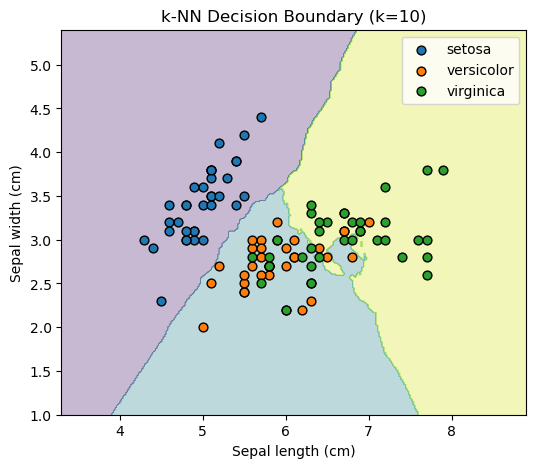

In [2]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
def plot_decision_boundary(clf, X, y, title):
    # Mesh grid for decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),np.linspace(y_min, y_max, 300))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    for class_value in np.unique(y):
        idx = np.where(y == class_value)
        plt.scatter(X[idx, 0], X[idx, 1], label=iris.target_names[class_value],edgecolors="k", s=40)
    plt.xlabel("Sepal length (cm)")
    plt.ylabel("Sepal width (cm)")
    plt.title(title)
    plt.legend()
    plt.show()
ks = [1, 3, 5, 10]
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, knn.predict(X_train))
    test_acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"k = {k} -> Train Accuracy = {train_acc:.3f}, Test Accuracy = {test_acc:.3f}")
    plot_decision_boundary(knn, X_train, y_train, f"k-NN Decision Boundary (k={k})")


    

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


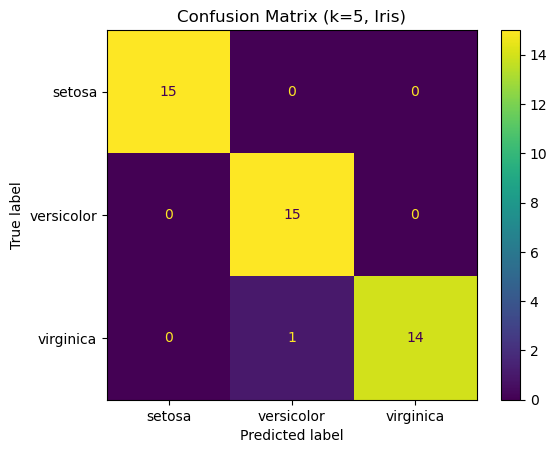


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



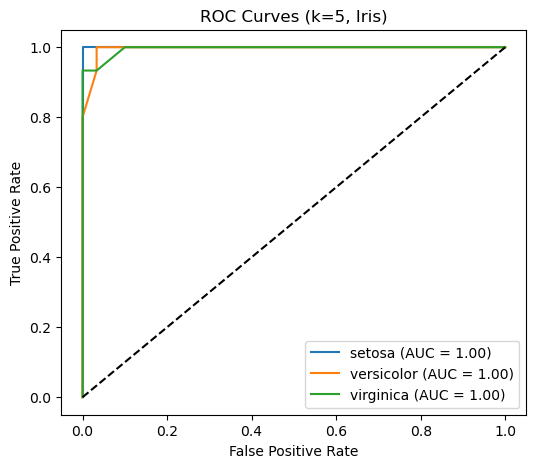

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot()
plt.title("Confusion Matrix (k=5, Iris)")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn.predict_proba(X_test)
n_classes = y_test_bin.shape[1]
plt.figure(figsize=(6,5))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{iris.target_names[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (k=5, Iris)")
plt.legend()
plt.show()
